In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [20]:
#Generator

def build_generator():
    model = Sequential()
    model.add(Dense(128, input_dim=100))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization())
    model.add(Dense(784, activation='tanh'))
    model.add(Reshape((28,28)))
    return model

In [21]:
#Discriminator
def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(128))
    model.add(LeakyReLU(0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [22]:
#Training
(X_train, _), _ =tf.keras.datasets.mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5) / 127.5

In [23]:
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

In [30]:
z = tf.keras.Input(shape=(100,))
img = generator(z)
discriminator.trainable = False
validity = discriminator(img)

gan = tf.keras.Model(z, validity)
gan.compile(optimizer='adam', loss='binary_crossentropy')

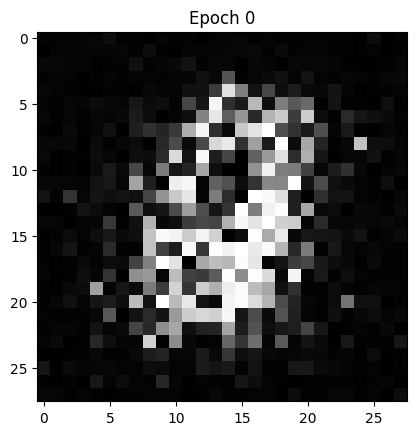

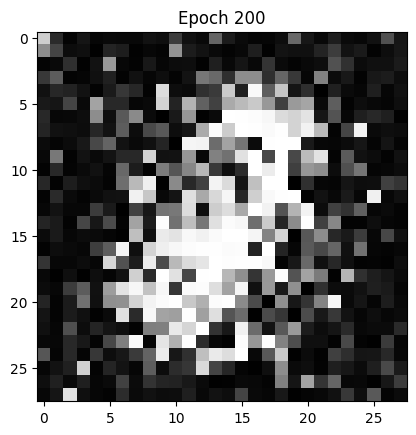

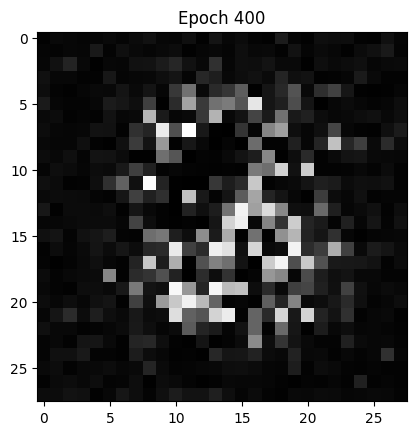

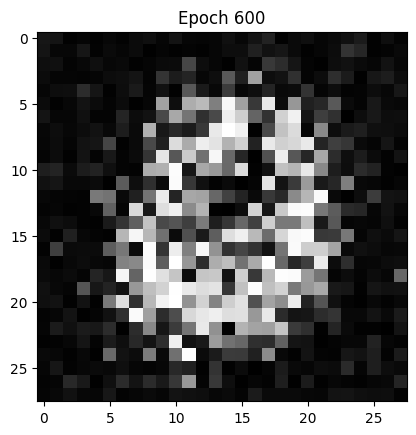

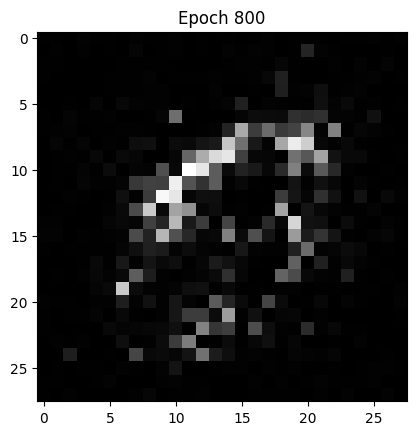

In [32]:
#Training Loop
for epoch in range(1000):
    idx = np.random.randint(0, X_train.shape[0], 64)
    real_imgs = X_train[idx]
    noise = np.random.normal(0, 1, (64,100))
    fake_imgs = generator.predict(noise)

    discriminator.trainable = True
    discriminator.train_on_batch(real_imgs, np.ones((64, 1)))
    discriminator.train_on_batch(fake_imgs, np.zeros((64, 1)))

    discriminator.trainable = False
    gan.train_on_batch(noise, np.ones((64, 1)))

    if epoch % 200 == 0:
        plt.imshow(fake_imgs[0], cmap='gray')
        plt.title(f"Epoch {epoch}")
        plt.show()